In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/tenx/Fraud_Detection_For_E_commerce_and_Bank_Transactions/notebooks

/content/drive/MyDrive/tenx/Fraud_Detection_For_E_commerce_and_Bank_Transactions/notebooks


**Data Exploration**

**Import Libraries**

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [4]:
warnings.filterwarnings('ignore')

In [5]:
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

In [6]:
class FraudEDA:
    def __init__(self, file_path):
        """
        Initializes the FraudEDA class by loading the dataset.
        :param file_path: Path to the CSV file containing the dataset.
        """
        self.df = pd.read_csv(file_path, parse_dates=["signup_time", "purchase_time"])
        print("Dataset loaded successfully. Shape:", self.df.shape)

    def correlation_analysis(self):
        """
        Computes and visualizes the correlation matrix to identify relationships between numerical variables.
        """
        numeric_cols = self.df.select_dtypes(include=[np.number])
        corr_matrix = numeric_cols.corr()
        plt.figure(figsize=(10, 6))
        sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Heatmap")
        plt.show()

    def univariate_analysis(self):
        """
        Performs univariate analysis on relevant numerical and categorical features.
        """
        # Numerical features
        num_cols = ["purchase_value", "age"]
        fig, axes = plt.subplots(1, len(num_cols), figsize=(12, 4))
        for i, col in enumerate(num_cols):
            sns.histplot(self.df[col], bins=30, kde=True, ax=axes[i])
            axes[i].set_title(f"Distribution of {col}")
        plt.show()

        # Categorical features
        cat_cols = ["source", "browser", "sex"]
        for col in cat_cols:
            plt.figure(figsize=(6, 3.5))
            sns.countplot(y=self.df[col], order=self.df[col].value_counts().index)
            plt.title(f"Distribution of {col}")
            plt.show()

    def purchase_value_vs_fraud(self):
        """
        Analyzes purchase value distribution across fraud classes.
        """
        print(self.df.groupby("class")["purchase_value"].describe())
        plt.figure(figsize=(6, 3.5))
        sns.boxplot(x="class", y="purchase_value", data=self.df)
        plt.title("Purchase Value vs Fraud")
        plt.show()

    def age_vs_fraud(self):
        """
        Analyzes age distribution across fraud classes.
        """
        print(self.df.groupby("class")["age"].describe())
        plt.figure(figsize=(6, 3.5))
        sns.boxplot(x="class", y="age", data=self.df)
        plt.title("Age vs Fraud")
        plt.show()

    def source_vs_fraud(self):
        """
        Analyzes source distribution across fraud classes.
        """
        print(self.df.groupby("source")["class"].value_counts(normalize=True))
        plt.figure(figsize=(6, 3.5))
        sns.countplot(x="source", hue="class", data=self.df)
        plt.title("Source vs Fraud")
        plt.show()

    def browser_vs_fraud(self):
        """
        Analyzes browser distribution across fraud classes.
        """
        print(self.df.groupby("browser")["class"].value_counts(normalize=True))
        plt.figure(figsize=(6, 3.5))
        sns.countplot(x="browser", hue="class", data=self.df)
        plt.title("Browser vs Fraud")
        plt.show()

    def country_vs_fraud(self):
        """
        Analyzes country distribution across fraud classes.
        """
        top_countries = self.df["country"].value_counts().nlargest(10).index
        country_data = self.df[self.df["country"].isin(top_countries)]
        print(country_data.groupby("country")["class"].value_counts(normalize=True))
        plt.figure(figsize=(10, 5))
        sns.countplot(y="country", hue="class", data=country_data, order=top_countries)
        plt.title("Top 10 Countries vs Fraud")
        plt.show()

# **Data Loading**

In [9]:
FRAUD_DATA_PATH = "../Data/processed/merged_fraud_df.csv"

In [10]:
eda = FraudEDA(FRAUD_DATA_PATH)
eda.df.head(2)

Dataset loaded successfully. Shape: (129146, 13)


,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,0,22058.0,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39.0,732758368,0,Japan
1,1,333320.0,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53.0,350311387,0,United States


# **Exploratory Data Analysis**

Univariate Analysis

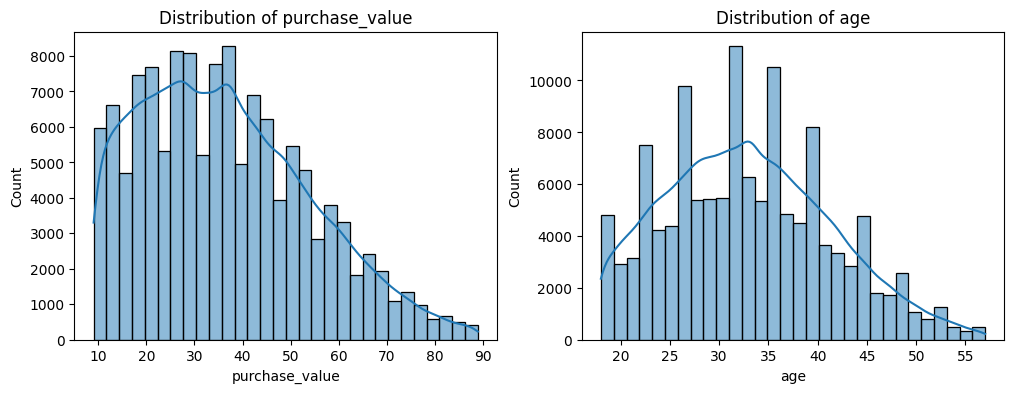

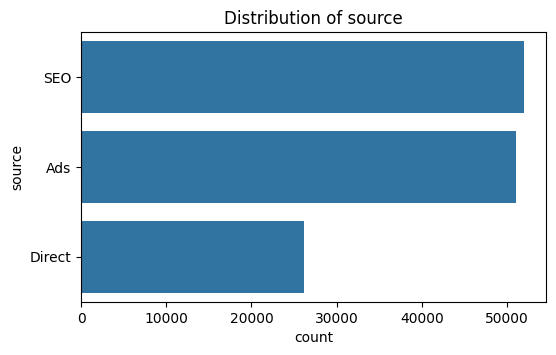

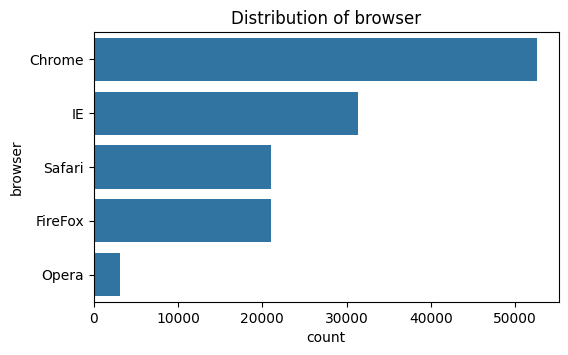

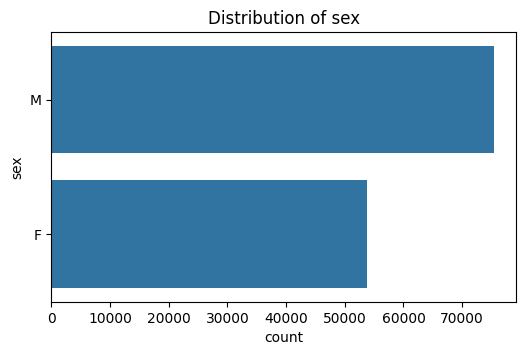

In [13]:
eda.univariate_analysis()

Bivariate Analysis

          count       mean        std  min   25%   50%   75%   max
class                                                             
0      116878.0  36.493070  17.574748  9.0  22.0  35.0  48.0  89.0
1       12268.0  36.635329  17.671319  9.0  22.0  35.0  49.0  89.0


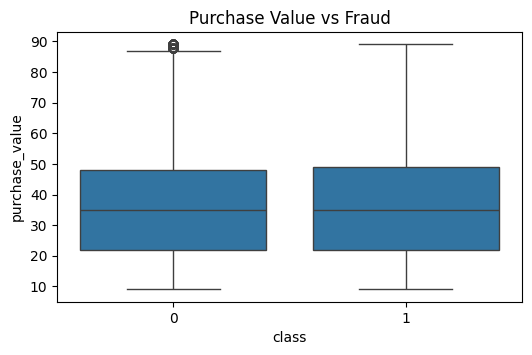

In [14]:
eda.purchase_value_vs_fraud()

          count       mean       std   min   25%   50%   75%   max
class                                                             
0      116878.0  32.973083  8.386840  18.0  27.0  33.0  39.0  57.0
1       12268.0  33.109784  8.349101  18.0  27.0  33.0  39.0  57.0


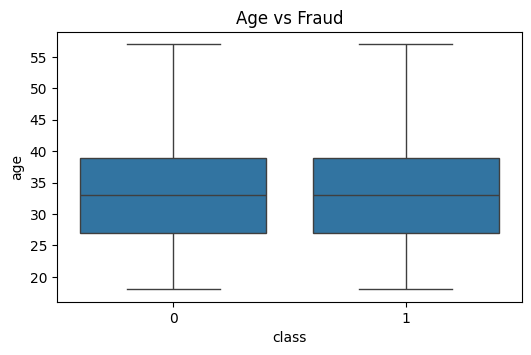

In [15]:
eda.age_vs_fraud()

source  class
Ads     0        0.906025
        1        0.093975
Direct  0        0.896436
        1        0.103564
SEO     0        0.908314
        1        0.091686
Name: proportion, dtype: float64


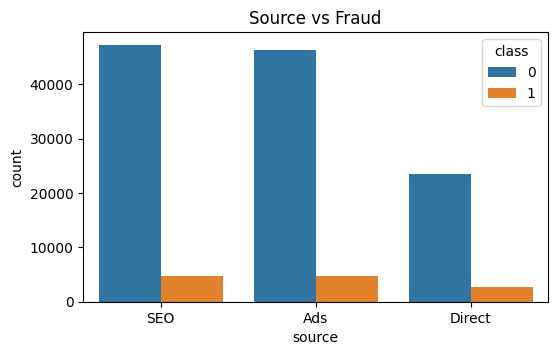

In [16]:
eda.source_vs_fraud()

browser  class
Chrome   0        0.898497
         1        0.101503
FireFox  0        0.904631
         1        0.095369
IE       0        0.914360
         1        0.085640
Opera    0        0.903982
         1        0.096018
Safari   0        0.907849
         1        0.092151
Name: proportion, dtype: float64


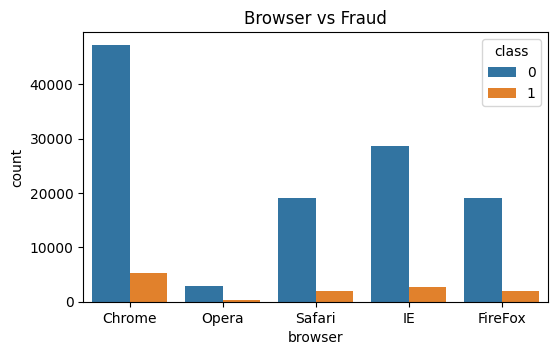

In [17]:
eda.browser_vs_fraud()

country            class
Brazil             0        0.908815
                   1        0.091185
Canada             0        0.883025
                   1        0.116975
China              0        0.913358
                   1        0.086642
France             0        0.905093
                   1        0.094907
Germany            0        0.928140
                   1        0.071860
Italy              0        0.914609
                   1        0.085391
Japan              0        0.902135
                   1        0.097865
Korea Republic of  0        0.908698
                   1        0.091302
United Kingdom     0        0.893764
                   1        0.106236
United States      0        0.904374
                   1        0.095626
Name: proportion, dtype: float64


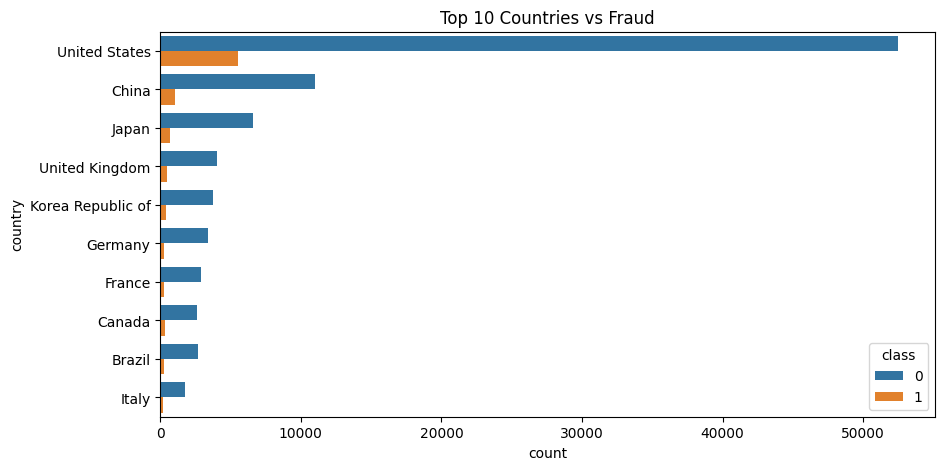

In [18]:
eda.country_vs_fraud()

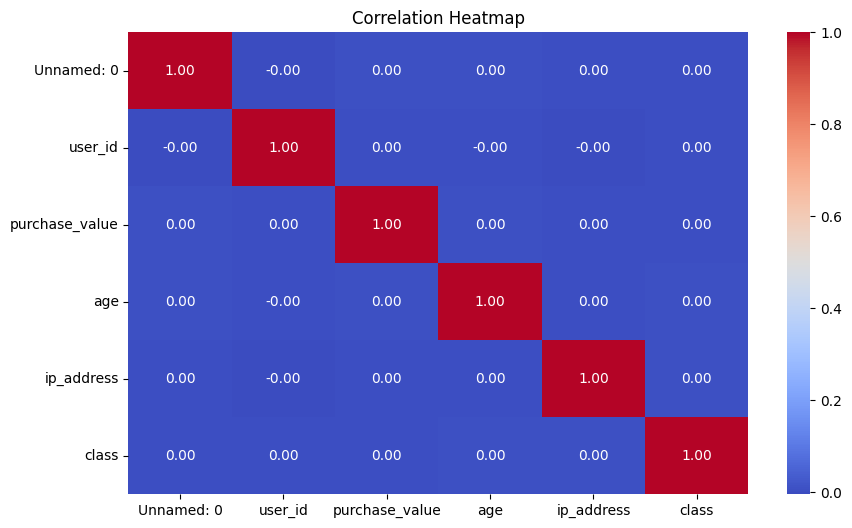

In [19]:
eda.correlation_analysis()